In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass
password = getpass.getpass()

········


In [2]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/bank'
engine = create_engine(connection_string)

In [72]:
query1 = '''SELECT
    DISTINCT f.film_id, f.title, f.release_year, f.rental_rate, f.length, f.rating,
    f.special_features, r.rental_date, r.return_date, r.customer_id, r.inventory_id,
    MAX(CASE WHEN r.rental_date BETWEEN '2005-05-01' AND '2005-05-31' THEN 1 ELSE 0 END) AS rented_in_may,
    SUM(f.rental_duration) AS rental_duration
FROM
    sakila.film f
LEFT JOIN
    sakila.inventory i USING (film_id)
LEFT JOIN
    sakila.rental r USING (inventory_id)
GROUP BY
    f.title
ORDER BY f.title ASC'''

df = pd.read_sql_query(query1, engine)
display(df.shape)
df.head(5)

(1000, 13)

,film_id,title,release_year,rental_rate,length,rating,special_features,rental_date,return_date,customer_id,inventory_id,rented_in_may,rental_duration
0,1,ACADEMY DINOSAUR,2006,0.99,86,PG,"Deleted Scenes,Behind the Scenes",2005-07-08 19:03:15,2005-07-11 21:29:15,431.0,1.0,1,144.0
1,2,ACE GOLDFINGER,2006,4.99,48,G,"Trailers,Deleted Scenes",2005-08-01 04:24:47,2005-08-04 05:36:47,271.0,9.0,0,21.0
2,3,ADAPTATION HOLES,2006,2.99,50,NC-17,"Trailers,Deleted Scenes",2005-07-27 01:21:19,2005-07-29 20:33:19,224.0,12.0,0,84.0
3,4,AFFAIR PREJUDICE,2006,2.99,117,G,"Commentaries,Behind the Scenes",2005-07-12 02:40:41,2005-07-16 04:56:41,184.0,16.0,1,115.0
4,5,AFRICAN EGG,2006,2.99,130,G,Deleted Scenes,2005-05-28 07:53:38,2005-06-04 12:45:38,106.0,23.0,1,72.0


In [73]:
'''
query2 = """SELECT
    DISTINCT f.title, f.film_id,
    MAX(CASE WHEN r.rental_date BETWEEN '2005-05-01' AND '2005-05-31' THEN 1 ELSE 0 END) AS rented_in_may
FROM
    sakila.film f
JOIN
    sakila.inventory i USING (film_id)
JOIN
    sakila.rental r USING (inventory_id)
GROUP BY
    f.title;"""

target_y = pd.read_sql_query(query2, engine)
display(y.shape)
target_y.head(5)
'''
print('')

In [74]:
X = df.drop(['rented_in_may'],axis=1)
y = df['rented_in_may'].astype(bool)
X.describe().T

,count,mean,min,25%,50%,75%,max,std
film_id,1000.0,500.5,1.0,250.75,500.5,750.25,1000.0,288.819436
release_year,1000.0,2006.0,2006.0,2006.0,2006.0,2006.0,2006.0,0.0
rental_rate,1000.0,2.98,0.99,0.99,2.99,4.99,4.99,1.646393
length,1000.0,115.272,46.0,80.0,114.0,149.25,185.0,40.426332
rental_date,958,2005-06-30 02:08:42.867432064,2005-05-24 23:08:07,2005-06-15 10:24:55.750000,2005-07-06 15:42:21,2005-07-27 01:13:53.750000,2005-08-02 22:34:06,NaN
return_date,958,2005-07-05 01:17:04.913361280,2005-05-26 01:01:46,2005-06-18 02:33:59,2005-07-10 10:51:22,2005-07-29 00:17:23.500000,2005-08-12 01:21:06,NaN
customer_id,958.0,294.802714,1.0,148.25,292.0,435.75,598.0,170.19279
inventory_id,958.0,2296.699374,1.0,1159.75,2322.0,3427.5,4574.0,1317.853616
rental_duration,1000.0,79.415,3.0,48.0,75.0,105.0,238.0,42.707431


In [75]:
X.dtypes

film_id                      int64
title                       object
release_year                 int64
rental_rate                float64
length                       int64
rating                      object
special_features            object
rental_date         datetime64[ns]
return_date         datetime64[ns]
customer_id                float64
inventory_id               float64
rental_duration            float64
dtype: object

In [76]:
X.nunique()

film_id             1000
title               1000
release_year           1
rental_rate            3
length               140
rating                 5
special_features      15
rental_date          958
return_date          958
customer_id          477
inventory_id         958
rental_duration      103
dtype: int64

In [77]:
X['rental_rate'] = X['rental_rate'].astype('object')

In [78]:
Xcat = X.select_dtypes('object')
Xcat

,title,rental_rate,rating,special_features
0,ACADEMY DINOSAUR,0.99,PG,"Deleted Scenes,Behind the Scenes"
1,ACE GOLDFINGER,4.99,G,"Trailers,Deleted Scenes"
2,ADAPTATION HOLES,2.99,NC-17,"Trailers,Deleted Scenes"
3,AFFAIR PREJUDICE,2.99,G,"Commentaries,Behind the Scenes"
4,AFRICAN EGG,2.99,G,Deleted Scenes
...,...,...,...,...
995,YOUNG LANGUAGE,0.99,G,"Trailers,Behind the Scenes"
996,YOUTH KICK,0.99,NC-17,"Trailers,Behind the Scenes"
997,ZHIVAGO CORE,0.99,NC-17,Deleted Scenes
998,ZOOLANDER FICTION,2.99,R,"Trailers,Deleted Scenes"


In [79]:
Xnum = X.select_dtypes('number')
Xnum.nunique()

film_id            1000
release_year          1
length              140
customer_id         477
inventory_id        958
rental_duration     103
dtype: int64

In [80]:
Xnum = Xnum.drop(['film_id','inventory_id','customer_id','release_year'],axis=1)
Xnum

,length,rental_duration
0,86,144.0
1,48,21.0
2,50,84.0
3,117,115.0
4,130,72.0
...,...,...
995,183,42.0
996,179,24.0
997,105,54.0
998,101,85.0


In [81]:
Xnum.columns

Index(['length', 'rental_duration'], dtype='object')

In [82]:
Xcat = X.select_dtypes('object')
Xcat.nunique()
Xcat = Xcat.drop(['title',],axis=1)

In [83]:
Xnum.describe().T

,count,mean,std,min,25%,50%,75%,max
length,1000.0,115.272,40.426332,46.0,80.0,114.0,149.25,185.0
rental_duration,1000.0,79.415,42.707431,3.0,48.0,75.0,105.00,238.0


In [84]:
Xcat.describe()

,rental_rate,rating,special_features
count,1000.00,1000,1000
unique,3.00,5,15
top,0.99,PG-13,"Trailers,Commentaries,Behind the Scenes"
freq,341.00,223,79


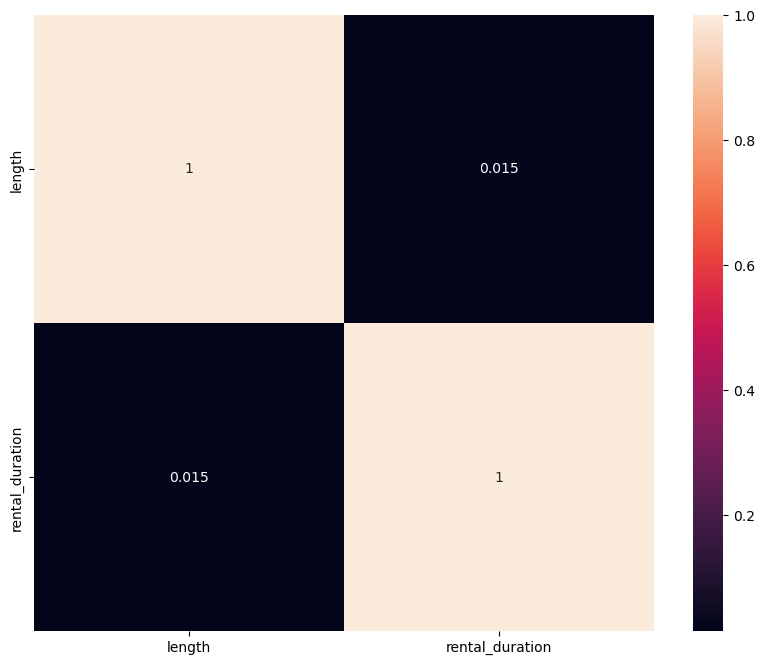

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=Xnum.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [89]:
X = pd.concat([Xnum, Xcat], axis=1)
X

,length,rental_duration,rental_rate,rating,special_features
0,86,144.0,0.99,PG,"Deleted Scenes,Behind the Scenes"
1,48,21.0,4.99,G,"Trailers,Deleted Scenes"
2,50,84.0,2.99,NC-17,"Trailers,Deleted Scenes"
3,117,115.0,2.99,G,"Commentaries,Behind the Scenes"
4,130,72.0,2.99,G,Deleted Scenes
...,...,...,...,...,...
995,183,42.0,0.99,G,"Trailers,Behind the Scenes"
996,179,24.0,0.99,NC-17,"Trailers,Behind the Scenes"
997,105,54.0,0.99,NC-17,Deleted Scenes
998,101,85.0,2.99,R,"Trailers,Deleted Scenes"


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [91]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_train_num = X_train.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm

,length,rental_duration
0,0.539568,0.404255
1,0.402878,0.455319
2,0.705036,0.314894
3,0.705036,0.242553
4,0.928058,0.374468
...,...,...
795,0.625899,0.412766
796,0.438849,0.370213
797,0.179856,0.038298
798,0.568345,0.225532


In [92]:
X_train_categorical = X_train.select_dtypes(include = object)
X_train_cat = pd.get_dummies(X_train_categorical, 
                             columns=['rental_rate', 'rating', 'special_features'], drop_first=True
                            )
X_train_cat.head()

,rental_rate_2.99,rental_rate_4.99,rating_NC-17,rating_PG,rating_PG-13,rating_R,special_features_Commentaries,"special_features_Commentaries,Behind the Scenes","special_features_Commentaries,Deleted Scenes","special_features_Commentaries,Deleted Scenes,Behind the Scenes",special_features_Deleted Scenes,"special_features_Deleted Scenes,Behind the Scenes",special_features_Trailers,"special_features_Trailers,Behind the Scenes","special_features_Trailers,Commentaries","special_features_Trailers,Commentaries,Behind the Scenes","special_features_Trailers,Commentaries,Deleted Scenes","special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes","special_features_Trailers,Deleted Scenes","special_features_Trailers,Deleted Scenes,Behind the Scenes"
657,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
299,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
898,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
507,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
510,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


/Users/iremnisa.kilinc/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


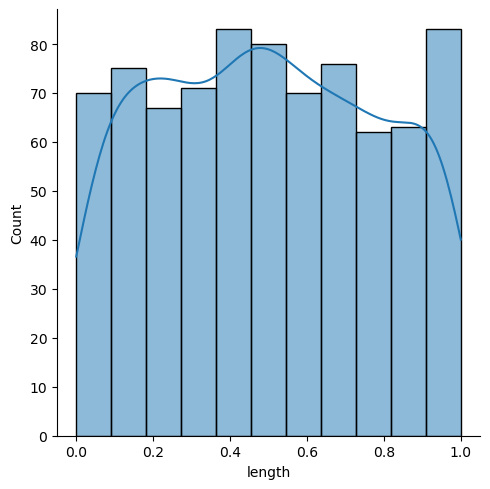

In [93]:
sns.displot(X_train_norm['length'], kde=True)
plt.show()


/Users/iremnisa.kilinc/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


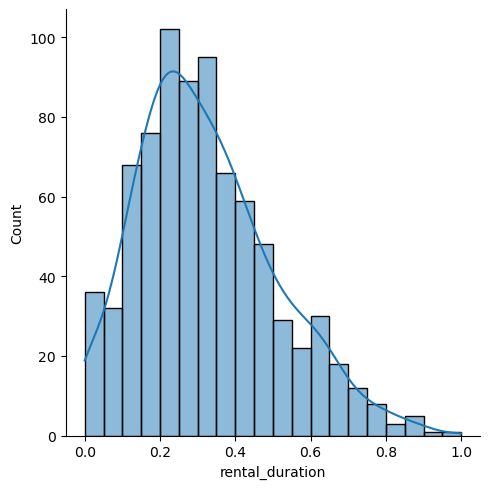

In [94]:
sns.displot(X_train_norm['rental_duration'], kde=True)
plt.show()

In [103]:
X_train_transformed = np.concatenate([X_train_normalized, X_train_cat], axis=1)

In [104]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

In [105]:
X_test_num = X_test.select_dtypes(include = np.number)

X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)
X_test_norm.head()

,length,rental_duration
0,0.366906,0.561702
1,0.388489,0.153191
2,0.834532,0.102128
3,0.633094,0.370213
4,0.107914,0.574468


In [106]:
X_test_categorical = X_test.select_dtypes(include = object)
X_test_cat = pd.get_dummies(X_test_categorical, 
                            columns=['rental_rate', 'rating', 'special_features'],
                            drop_first=True)


In [107]:
X_test_cat.head()

,rental_rate_2.99,rental_rate_4.99,rating_NC-17,rating_PG,rating_PG-13,rating_R,special_features_Commentaries,"special_features_Commentaries,Behind the Scenes","special_features_Commentaries,Deleted Scenes","special_features_Commentaries,Deleted Scenes,Behind the Scenes",special_features_Deleted Scenes,"special_features_Deleted Scenes,Behind the Scenes",special_features_Trailers,"special_features_Trailers,Behind the Scenes","special_features_Trailers,Commentaries","special_features_Trailers,Commentaries,Behind the Scenes","special_features_Trailers,Commentaries,Deleted Scenes","special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes","special_features_Trailers,Deleted Scenes","special_features_Trailers,Deleted Scenes,Behind the Scenes"
467,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
70,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
581,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
966,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
913,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [108]:
list(X_train_cat.columns)==list(X_test_cat.columns)

True

In [109]:
X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)

In [114]:
predictions = classification.predict(X_test_transformed)
predictions
classification.score(X_test_transformed, y_test)

0.655

In [115]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[ 27,  53],
       [ 16, 104]])

In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

       False       0.63      0.34      0.44        80
        True       0.66      0.87      0.75       120

    accuracy                           0.66       200
   macro avg       0.65      0.60      0.59       200
weighted avg       0.65      0.66      0.63       200

